# Entregable 2
## Inteligencia Artificial

En este entregable se realizará la aplicación de Regresión Lineal y Regresión logística. 

## Regresión Lineal:

Trabajaremos con los datos de la clase de EDA [(Clase02)](https://github.com/andrescastro-itm/AI_ITM/blob/main/Clase02/EDA.ipynb). 

1. Deben cargar los datos y realizar una depuración de los mismos (pueden usar lo que se hizo en la clase de EDA)

2. Realizar una división del conjunto de entrenamiento en conjuntos de entrenamiento/prueba, con los porcentajes que consideren

3. Posteriormente, deben entrenar un regresor lineal y reportar el error cuadrático medio en la predicción del precio de venta _(SalePrice)_ en el conjunto de prueba

4. Realizar una remoción de algunas características (a discreción de ustedes) y realizar de nuevo el entrenamiento del regresor lineal. Reportar el error cuadrático medio en la predicción del precio de venta _(SalePrice)_ en el conjunto de prueba.

# **Planteamiento:**
 Para el desarrollo del proceso llevado a cabo por el regresor lineal se tiene un conjunto de datos basados en características físicas y numéricas de una base de datos sobre casas. En este se puede visualizar como el tamaño, cuentos años tiene de construcción el área de la casa, si posee sótano, piscina entre otras, con ellas se harán análisis de predicción para determinar ciertas características del sistema y así darle una inteligente aplicación el método de regresión logística.

In [1]:
#celda para importar, pueden agregar las que requieran

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

Inicialmente se cargan los datos al programa con el fin de visualizar su tamaño, los datos que contiene e información de valor para el desarrollo del proceso.

# **Procedimiento:**
por medio de las funciones aplicadas se inicia con la limpieza de la base de datos, para este caso por medio de .drop se eliminan por completo las columnas que están nulas, o completamente vacías, estas no brindan ningún tipo de información al regresor que se desea aplicar, creando así una base de datos limpia.

In [3]:
df = pd.read_csv("train.csv",index_col=0)

In [4]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
df.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

## Solución a punto 1.

Rellenar columnas que poseen datos nulos, realizando imputación de datos con el promedio.

In [7]:
df = df.fillna({'LotFrontage': df['LotFrontage'].mean(), 'MasVnrArea': df['MasVnrArea'].mean(), 'GarageYrBlt': df['GarageYrBlt'].mean()})

Limpieza del dataset realizando 'drop' sobre dos características que poseen casi en su totalidad datos nulos.

In [8]:
def clean_data(df):
    # Drop column: 'Alley'
    df = df.drop(columns=['Alley'])
    # Drop column: 'PoolQC'
    df = df.drop(columns=['PoolQC'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


Separación de conjuntos de características entre númericas y categóricas.

In [9]:
numerical_features_all = df_clean.select_dtypes(include=np.number).columns
print('Columnas numéricas:',numerical_features_all)
df_num = df[numerical_features_all]

string_columns = df_clean.select_dtypes(include=['object']).columns
print('Columnas categóricas:',string_columns)

Columnas numéricas: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Columnas categóricas: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFin

Aplicación de get_dummies sobre las características categóricas para que devuelvan un valor númerico.

Posterior a esto se realiza una división del conjunto de datos en estudio por medio del cual se separan en dos partes, variables cualitativas y variables cuantitativas, de esta forma se tiene una manera más viable de normalizar las variables y así poder tener conjuntos de datos que puedan ser comparados entre ellos, y así poder predecir alguna característica en específico. Aquellas variables que son categóricas o cualitativas no tienen una forma cuantitativa de compararse, por esta razón deben ser convertidas en unas que, si sean funcionales, por medio de la Get_dummies, en este caso convertimos los datos y los preparamos para entrenarse.

In [10]:
df_str = pd.get_dummies(df_clean, columns=string_columns)
df_str.drop('SalePrice', axis = 1, inplace = True)

Concatenar características númericas y categóricas(get_dummies) para generar el nuevo dataset completo.

In [11]:
df = pd.concat([df_str, df_num], axis=1)

Verifiación de datos nulos sobre el nuevo dataset

In [12]:
df.isnull().any()

MSSubClass     False
LotFrontage    False
LotArea        False
OverallQual    False
OverallCond    False
               ...  
PoolArea       False
MiscVal        False
MoSold         False
YrSold         False
SalePrice      False
Length: 320, dtype: bool

In [13]:
df.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [14]:
df_2 = df.copy()

## Solución a punto 2.

Como variable a predecir se escoge Sale_Price, es decir el precio de venta de la casa y por medio de Split se separarán los datos entre entrenamiento (con un porcentaje del 80%) y test (con uno de 20%).
Por medio del regresor lineal se realiza la estimación del precio de la casa basado en los datos de área, tamaño, ubicación y demás parámetros ingresados en el sistema de predicción, además de esto se implementa la función del error cuadrático medio, con el cual se mide que tan eficiente fue el proceso que se realizó, es decir evaluar el método implementado.


In [15]:
from sklearn.model_selection import train_test_split

y = df_num['SalePrice']
X = df_num.drop('SalePrice', axis=1)

# Split del dataset en conjuntos de train y test, con un 80% para train y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Solución a punto 3.

Por ultimo por medio de la correlación obtenida de la base de datos se inicia una búsqueda de las variables con importancia para el sistema, es decir aquellas que tienen información más valiosa para predecir, por medio de la correlación se estudian cuales variables no tienen mucha relación las entre ellas y pueden ser eliminadas, dejando así el dataset con datos de más relevancia, esto posteriormente se hace con el fin de realizar el proceso de regresión logística y evaluar si el error llega a ser más bajo.



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear un objeto de regresión lineal
regressor = LinearRegression()

# Ajustar el regresor a los datos de prueba
regressor.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)
#print(y_pred)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio es: {mse}')

El error cuadrático medio es: 1356492637.9490519


Como modelo de coeficiente de determunación (R2) nos indica que la su proporción de 0.823 con un valor en el rango recomendado (que es de 0.7 en adelante), para este caso la variable a estimar logró ser predecida con eficiencia, por medio de la información analizada se pretende generar un estimador con una mayor exactitus, diferente smodelos pueden traer consigo mejores predicciones paro en este caso el regresor lineal logr[o cumplir eficientemente el trabajo.]

In [17]:
r2_score(y_test, y_pred)

0.8231505934287368

In [18]:
from sklearn.preprocessing import MinMaxScaler

y_norm = df_num['SalePrice']
X_norm = df_num.drop('SalePrice', axis=1)

# Split del dataset en conjuntos de train y test, con un 80% para train y 20% para test
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)


# Crear un objeto MinMaxScaler
scaler = MinMaxScaler() #Para datos
scaler2 = MinMaxScaler() #Para etiquetas

y_train_norm = np.expand_dims(y_train_norm, 1)
# Ajustar y transformar y_test
scaled_data_y_train = scaler2.fit_transform(y_train_norm)
print(type(scaled_data_y_train))

y_test_norm = np.expand_dims(y_test_norm, 1)
# Ajustar y transformar y_test
scaled_data_y_test = scaler2.transform(y_test_norm)
print(type(scaled_data_y_test))

# No se utilizan debido a que no influyen en el resultado 

""" # Ajustar y transformar X_train
scaled_data_X_train = scaler.fit_transform(X_train_norm)
print(type(scaled_data_X_train))

# Ajustar y transformar X_test
scaled_data_X_test = scaler.transform(X_test_norm)
print(type(scaled_data_X_test)) """


# Crear un objeto de regresión lineal
regressor_norm = LinearRegression()

# Ajustar el regresor a los datos de prueba
regressor_norm.fit(X_train_norm, scaled_data_y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_norm = regressor_norm.predict(X_test_norm)
#print(y_pred)

# Calcular el error cuadrático medio
mse = mean_squared_error(scaled_data_y_test, y_pred_norm)
print(f'El error cuadrático medio es: {mse}')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
El error cuadrático medio es: 0.0026901618886318265


In [19]:
r2_score(scaled_data_y_test, y_pred_norm)

0.8231505934287293

## Solución a punto 4

Visualización de la correlación de características respecto a 'SalePrice', la cual es la característica objetivo de predicción, este se realiza con el conjunto de datos númericos.

Por medio del gráfico se extraen algunas características a discreción propia que posean menor relevancia(correlación) con 'SalePrice', estas son seleccionadas en un valor de correlación entre -0.2 a 0.2. 

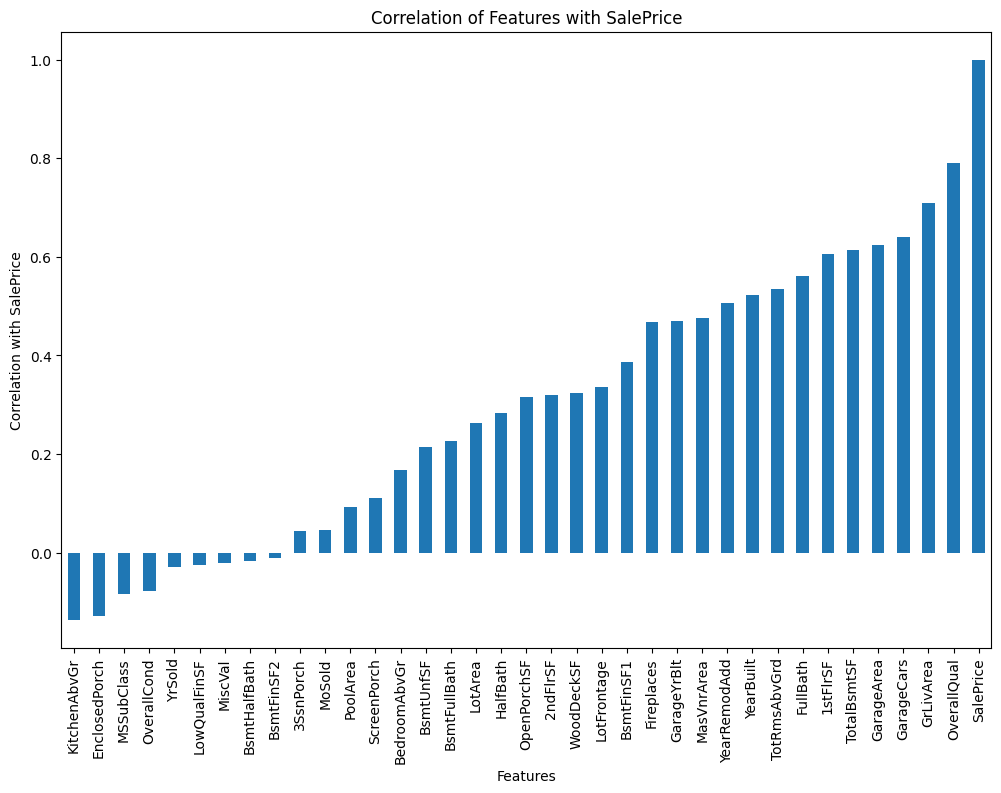

In [32]:
correlation = df_num.corr()['SalePrice'].sort_values()

plt.figure(figsize=(12, 8))
correlation.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Correlation of Features with SalePrice')
plt.show()


In [14]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(df[numerical_features_all].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlación Entre Variables Numéricas')
#plt.show()

Al realizar la remoción de algunas características, el nuevo conjunto de datos es de esperar que cambie el valor del MSE dado por la regresión líneal sobre este conjunto de datos.

In [35]:
# Características a eliminar
features_to_remove = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', 'BsmtUnfSF']

# Remoción de estas características sobre el dataframe
df_reduced = df_num.drop(features_to_remove, axis=1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop('SalePrice', axis=1), df_reduced['SalePrice'], test_size=0.2, random_state=42)

# Crear un objeto de regresión lineal
regressor_reduced = LinearRegression()

# Ajustar el regresor a los datos de entrenamiento
regressor_reduced.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_reduced = regressor_reduced.predict(X_test)

# Calcular el error cuadrático medio
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
print(f'El error cuadrático medio es: {mse_reduced}')

El error cuadrático medio es: 1451596268.584441


Para este caso es posible notar como el valor obtenido para la métrica R2 la variable predicha es obtenida a partir de la modificación de la base de datos eliminando alguna de las características del conjunto de datos, aquellas que no aportaban mayor imformación o proporcionalidad respecto a otras. Es posible notar como podemos ontener un valor de error más bajo con un R2 de 0.81 indicando as[i mejor acertividad al momento de estimar el precio de venta.

In [36]:
r2_score(y_test, y_pred_reduced)

0.8107516904268961

## Regresión Logística:

Estos puntos los deben trabajar con **alguno (o si prefieren, todos)** de los conjuntos de datos del proyecto final. 

Lo pueden realizar de dos formas:

- Seleccionar únicamente los datos correspondientes a las clases 1 y 2, es decir, los datos con etiqueta Sabana o Bosque. Verificar que les deben quedar en total 29540 datos entre los conjuntos de entrenamiento, validación y prueba. ó
- Trabajar con las tres clases aprovechando que sklearn utiliza el esquema uno-contra-todos (one-vs-rest OvR)

Realizar las siguientes tareas:

1. Entrenar un modelo de regresión logística con el conjunto de entrenamiento
2. Reportar los resultados logrados con el conjunto de validación en términos de precisión, recall y F1-score. Para este punto pueden usar [classification_report de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
3. Mostrar una matriz de confusión para la clasificación hecha en el conjunto de validación


In [4]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


En Regresión logística se tiene otra base de datos con la cual se obtiene información espacial, se tienen datos sobre un bosque y una sabana, con una tarjeta se tomaron datos en diferentes condiciones y se desea predecir en qué área se encuentra un microcontrolador. Con ellos se realiza la empieza de los datos y extracción de características con el fin de obtener una estimación eficaz.

# Lectura de Datos

In [5]:
with open('./ais_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_ai = unserialized_data['X']
    y_ai = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [6]:
print(f'Tamaño matriz de características: {X_ai.shape}')
print(f'Tamaño vector de etiquetas: {y_ai.shape}')

Tamaño matriz de características: (71497, 60)
Tamaño vector de etiquetas: (71497, 1)


In [7]:
with open('./vgg_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_vgg = unserialized_data['X']
    y_vgg = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [8]:
print(f'Tamaño matriz de características: {X_vgg.shape}')
print(f'Tamaño vector de etiquetas: {y_vgg.shape}')

Tamaño matriz de características: (71497, 128)
Tamaño vector de etiquetas: (71497, 1)


In [ ]:
with open('./yamn_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_yamn = unserialized_data['X']
    y_yamn = unserialized_data['y']
    print('Datos Cargados!')

In [ ]:
print(f'Tamaño matriz de características: {X_yamn.shape}')
print(f'Tamaño vector de etiquetas: {y_yamn.shape}')

Tamaño matriz de características: (71497, 1024)
Tamaño vector de etiquetas: (71497, 1)


In [ ]:
with open('./panns_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_panns = unserialized_data['X']
    y_panns = unserialized_data['y']
    print('Datos Cargados!')

In [ ]:
print(f'Tamaño matriz de características: {X_panns.shape}')
print(f'Tamaño vector de etiquetas: {y_panns.shape}')

In [11]:
print(np.unique(y_vgg, return_counts=True)) # Las etiquetas son 0, 1 y 2. Hacen referencia a lo siguiente:
NumtoCover = {0: 'Pastizal', 1:'Sabana', 2:'Bosque'}


(array([0., 1., 2.]), array([41957, 14994, 14546]))


# Preparación de Datos

Se preparan los datos para su respectivo análisis, en este caso se identifican los valores NaN, los cuales serán posteriormente imputados por medio de la media de los datos característicos del sistema. La imputación se basa en sobrescribir de forma inteligente aquellos vacíos de información con el fin de tener un data set con un tamaño eficiente para la predicción. Se realiza la división de la división de los datos de entrenamiento teniendo únicamente en cuenta las clases 1 y 2, sabana y bosque, obteniendo un conjunto de entrenamiento con 29540 datos.

In [12]:
nan_indices = np.isnan(X_ai)
num_nan_per_column = np.sum(nan_indices, axis=0)
total_nan = np.sum(nan_indices)
print("Número total de valores NaN en los datos originales:", total_nan)
print("Número de valores NaN por columna:")
print(num_nan_per_column)

Número total de valores NaN en los datos originales: 481
Número de valores NaN por columna:
[  0   0   0   0   0   0   0   0   0   0   0   0 478   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0
   0   0   0   0   0   0]


Imputación de Datos


In [13]:
imputer = SimpleImputer(strategy='mean')
X_ai_imputed = imputer.fit_transform(X_ai)

Selección de Clases

In [14]:
selected_indices = np.where((y_ai == 1) | (y_ai == 2))[0]
X_selected = X_ai_imputed[selected_indices] #comentar [selected_indices] paara poder usar todas las clases
y_selected = y_ai[selected_indices] #comentar [selected_indices] paara poder usar todas las clases

Entrenamiento de Datos (Verificar Cambio)

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Verificación de Total de Datos


In [16]:
total_samples = len(X_train) + len(X_val) + len(X_test)
print("Total de datos seleccionados:", total_samples)

Total de datos seleccionados: 29540


# Solución a Punto 1

Aplicando Regresión Logistica con el Conjunto de Entrenamiento

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Solución a Punto 2

Se aplica el método de regresión logística en el conjunto de train y se realiza un reporte de clasificación, es este obtenemos los valores de eficiencia del conjunto clase 1 de datos son precisión de 0.53,  recall = 0.61, f1-score = 0.57  valores obtenidos no son del todo eficientes sin embargo se realizó la imputación con la recomendación de la media obtenida, como estrategia, sin embargo se puede implementar otras estrategias de imputación de datos.

Reporte de Clasificación

In [18]:
y_pred = model.predict(X_val)

#Resultados en términos de precisión, recall y F1-score (SOLO DATOS DE VALIDACIÓN )
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_pred))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

         1.0       0.53      0.61      0.57      2251
         2.0       0.53      0.45      0.48      2180

    accuracy                           0.53      4431
   macro avg       0.53      0.53      0.53      4431
weighted avg       0.53      0.53      0.53      4431



# Solución a Punto 3

La matriz de confusión obtenida nos demuestra que le dato que mejor predijo fue de Sabana en comparación al espacio de Bosque, con un valor de 1368 de True Positive, y 980 True negative, este caso se tiene en cuenta la clase positiva como sabana. Comparado con los otros valores obtenidos en este caso la regresión logística fue más asertiva para esta clase Sabana. A modo de acertividad también se detalla en forma de porcentaje sobre el total de datos ubicados en la matriz de confución dado el valor que se desea estimar, obteniendo un 60% de acierto por medio del cual se analiza una correcta predicci[ón de la clase Sabana y un 45% para Bosque teniendo en cuenta que al programa se le facilita o aprende de forma más eficiente con la clase 1.

Mátriz de Confusión

In [19]:
def plot_cm(y_test, predictions, filename=None, figsize=(8,8), ticklabels=None):
    cm = confusion_matrix(y_test, predictions, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    if ticklabels is None:
        ticklabels = list(range(1, len(np.unique(y_test))+1))
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '%.1f%%\n%d' % (0, 0)
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    b = sns.heatmap(cm, cmap= "Greens", annot=annot, fmt='',cbar=False,linewidths=0.2, # type: ignore
                    yticklabels=ticklabels,xticklabels=ticklabels, ax=ax,annot_kws={"fontsize":24}) # type: ignore
    plt.tight_layout()
    ax.set_xticklabels(b.get_xticklabels(), size=16)
    ax.set_yticklabels(b.get_yticklabels(), size=16) 
    if filename is not None:
        plt.savefig(filename, transparent=True, dpi=300)

/var/folders/rc/xt1rcjcn7nq5k_lmm5vpz4t40000gn/T/ipykernel_49647/2136776828.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


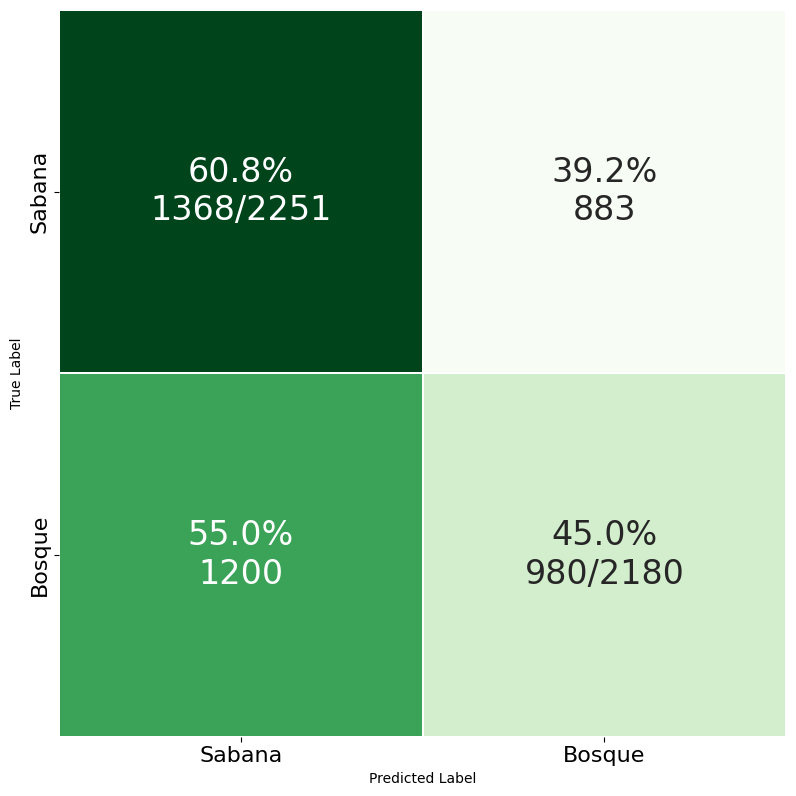

In [20]:
plot_cm(y_val, y_pred, ticklabels=['Sabana', 'Bosque'])

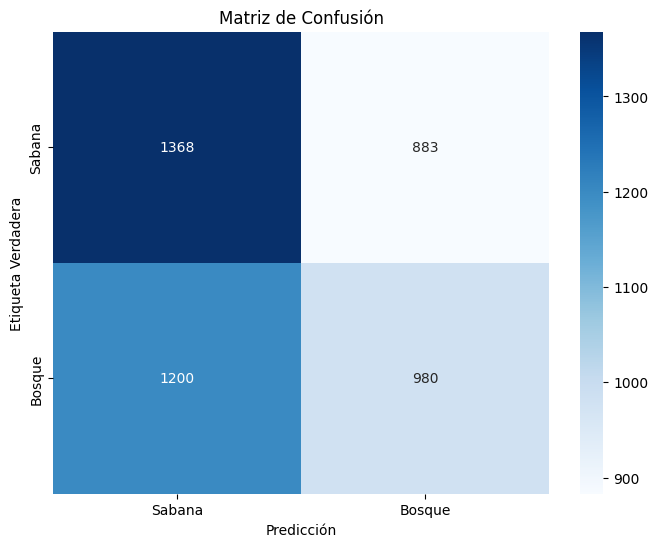

In [54]:
conf_matrix = confusion_matrix(y_val, y_pred)
class_labels = ['Sabana', 'Bosque']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()